# Ejemplo de análisis exploratorio de datos (pt. 3)

## Agrupación y agregación

Fase de análisis que tiene como propósito agrupar y agregar aquellas variables o atributos que puedan conformar tipos de datos (más) genéricos.

- La categorización (agrupación) consiste en estructurar información: crear un orden jerárquico a partir de la complejidad.
- Las categorías se forman en función de la entidad con valores de atributos comunes, y presenta diferentes perspectivas.
- Las categorías permiten organizar o reorganizar los datos.
- Permite crear características para cualquier modelo de aprendizaje automático que pueda empleado posteriormente.

En esta fase podrían abordarse las siguientes tareas:

- Agregación de categorías
- Agrupación de variables continuas
- Agrupación (_clustering_)

### Agregación de variables categóricas

Una forma de crear categorías adicionales consiste en __identificar categorías de nivel superior__ a partir de atributos existentes.

In [3]:
import pandas as pd

vehiculos = pd.read_csv("./out/vehiculos-2-limpio_analisis.csv")
vehiculos

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,rendimiento,co2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500
...,...,...,...,...,...,...,...,...,...,...,...
36925,smart,fortwo electric drive coupe,2011,3.0,4.0,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,87,0.000000
36926,smart,fortwo electric drive coupe,2013,3.0,4.0,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,107,0.000000
36927,smart,fortwo electric drive coupe,2014,3.0,4.0,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,107,0.000000
36928,smart,fortwo electric drive coupe,2015,3.0,4.0,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,107,0.000000


En el caso del ejemplo estudio, es posible obtener el número de valores únicos y el tipo de datos para cada atributo.

In [4]:
def valores_unicos_por_columna(dframe):
    for col in dframe:
        print("{:5} ({}): {}".format(
            len(dframe[col].unique()),
            dframe[col].dtype,
            dframe[col].name
        ))

valores_unicos_por_columna(vehiculos)

  133 (object): fabricante
 3791 (object): modelo
   35 (int64): year
   66 (float64): desplazamiento
    9 (float64): cilindros
   37 (object): transmision
    7 (object): traccion
   34 (object): clase
   14 (object): combustible
   84 (int64): rendimiento
  597 (float64): co2


El atributo `transmision` contiene un total de 37 valores. A continuación se muestran el universo de valores de este atributo.

[`DataFrame.value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)

In [10]:
vehiculos['transmision'].value_counts()

Automatic 4-spd                     10599
Manual 5-spd                         7901
Automatic 3-spd                      2762
Automatic (S6)                       2736
Manual 6-spd                         2469
Automatic 5-spd                      2165
Automatic 6-spd                      1461
Manual 4-spd                         1318
Automatic (S8)                       1085
Automatic (S5)                        825
Automatic (variable gear ratios)      709
Automatic 7-spd                       673
Automatic (AM-S7)                     285
Automatic (S7)                        273
Automatic 8-spd                       269
Automatic (S4)                        225
Automatic (AM7)                       182
Automatic (AV-S6)                     169
Automatic (A1)                        130
Automatic (AM6)                       121
Automatic 9-spd                       112
Automatic (AM-S6)                      88
Automatic (AV-S7)                      86
Manual 7-spd                      

Una categorización básica puede ser aplicada estableciendo dos clases (etiquetas) de transmisión: `Automatica` o `Manual`.

Para crear esta nueva categorización, se crea el atributo `tipo-transmision` a partir de los criterios:
- `Automatica` para todos los valores de `transmision` que comienzan con `A`
- `Manual` para todos aquellos valores de `transmision` que comienzan con `M`.

[`DataFrame.loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) selección por índice (row, col).
[`Series.str.startswith`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.startswith.html)

In [12]:
vehiculos.loc[ vehiculos['transmision'].str.startswith('A'), 'tipo-transmision' ] = 'Automatica'
vehiculos.loc[ vehiculos['transmision'].str.startswith('M'), 'tipo-transmision' ] = 'Manual'
vehiculos

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,rendimiento,co2,tipo-transmision
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Automatica
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Automatica
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Automatica
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Automatica
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Automatica
...,...,...,...,...,...,...,...,...,...,...,...,...
36925,smart,fortwo electric drive coupe,2011,3.0,4.0,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,87,0.000000,Automatica
36926,smart,fortwo electric drive coupe,2013,3.0,4.0,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,107,0.000000,Automatica
36927,smart,fortwo electric drive coupe,2014,3.0,4.0,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,107,0.000000,Automatica
36928,smart,fortwo electric drive coupe,2015,3.0,4.0,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,107,0.000000,Automatica


__NOTA__: La librería Pandas incluye un `dtype` especial para variables categóricas llamado `category`. Este tipo, en contraste con `object` (generalmente `str`), extiende las funcionalidades soportadas sobre este tipo de atributo. Además, el tipo `category` en general ocupa menos espacio en memoria (si su cardinalidad no es muy elevada).

[`DataFrame.astype()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) convierte un objeto Pandas en un `dtype` especificado.

In [13]:
vehiculos['tipo-transmision'] = vehiculos['tipo-transmision'].astype("category")
vehiculos['tipo-transmision'].dtype

CategoricalDtype(categories=['Automatica', 'Manual'], ordered=False)

In [14]:
vehiculos['tipo-transmision'].value_counts()

Automatica    25076
Manual        11854
Name: tipo-transmision, dtype: int64

Por otra parte, el atributo `combustible` contiene 14 valores,

In [15]:
vehiculos['combustible'].value_counts() # E85: Etanol

Regular                        24078
Premium                        10206
Gasoline or E85                 1215
Diesel                           933
Electricity                      139
Premium or E85                   124
Midgrade                          77
CNG                               60
Premium and Electricity           30
Gasoline or natural gas           20
Regular Gas and Electricity       20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: combustible, dtype: int64

Estos valores podrían agruparse en la categoría `tipo-combustible`, de acuerdo con los siguientes criterios:
- `Normal` para vehículos que usen combustible `Regular`
- `Premium` para vehículos que usen combustible `Premium`
- `Hibrido` para vehículos que usen `Electricity`
- `Otros` para vehículos que usen cualquier otro tipo de combustible

In [16]:
vehiculos['tipo-combustible'] = 'Otros'
vehiculos.loc[vehiculos['combustible'] == 'Regular', 'tipo-combustible'] = 'Normal'
vehiculos.loc[vehiculos['combustible'] == 'Premium', 'tipo-combustible'] = 'Premium'
vehiculos.loc[vehiculos['combustible'].str.contains('Electricity'), 'tipo-combustible'] = 'Hibrido'
vehiculos['tipo-combustible'] = vehiculos['tipo-combustible'].astype("category")

vehiculos['tipo-combustible'].value_counts()

Normal     24078
Premium    10206
Otros       2437
Hibrido      209
Name: tipo-combustible, dtype: int64

Otras agrupaciones de variables categóricas que podrían ser aplicadas,

- Considerando que existen 35 clases de vehículos, el atributo `clase-tipo` podría agrupar clases de acuerdo con el siguiente criterio:
    - Auto pequeño: `compact cars`, `subcompact cars`, `two seaters`, `minicompact cars`
    - Auto mediano: `midsize Cars`
    - Autos grande: `large Cars`
    - Station Wagon: clases de vehículos con la palabra `station`
    - Pickup: clases de vehículos que son `trucks`
    - Especial: clases de vehículos que son `special purpose`
    - Deportivo: clases de vehículos que son `sport utility`
    - Van-Minivan: clases de vehículos que son de tipo `van` o `minivan`.
- Las categorías de motores podrían ser agrupados (por ejemplo en 5 grupos) de acuerdo con los valores de la variable `desplazamiento`.

### Agrupación de variables continuas

Las variables continuas podrías ser agrupadas por medio de un umbral o de una distribución.

- Una forma intuitiva de hacerlo, es por medio del uso de __quintiles__, la cual define una categoría media, otras dos categorías moderadamente más altas y más bajas, respectivamente, y dos categorías extremas.
- Los __quintiles__ dividen en 5 intervalos regulares la función de distribución de una variable aleatoria: `0.20, 0.40, 0.60, y 0.80`.

Por ejemplo, para los niveles de emisión de `co2`, los datos se agrupan en 5 categorías,

[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) discretiza una variable en cubos de igual tamaño según el rango o según los cuantiles de muestra.

In [17]:
categoria_emision = ['muy baja', 'baja', 'moderada', 'alta', 'muy alta']
vehiculos['emision-contaminante'] = pd.qcut(vehiculos['co2'], 5, categoria_emision)
vehiculos

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,rendimiento,co2,tipo-transmision,tipo-combustible,emision-contaminante
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Automatica,Normal,alta
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Automatica,Normal,muy alta
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Automatica,Normal,alta
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Automatica,Normal,muy alta
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Automatica,Premium,alta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36925,smart,fortwo electric drive coupe,2011,3.0,4.0,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,87,0.000000,Automatica,Hibrido,muy baja
36926,smart,fortwo electric drive coupe,2013,3.0,4.0,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,107,0.000000,Automatica,Hibrido,muy baja
36927,smart,fortwo electric drive coupe,2014,3.0,4.0,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,107,0.000000,Automatica,Hibrido,muy baja
36928,smart,fortwo electric drive coupe,2015,3.0,4.0,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,107,0.000000,Automatica,Hibrido,muy baja


Para el atributo `rendimiento`, se definen 5 categorías de nivel de consumo,

In [20]:
categoria_nivel_rendimiento = ['muy bajo', 'bajo', 'moderado', 'alto', 'muy alto']
vehiculos['nivel-rendimiento'] = pd.qcut(vehiculos['rendimiento'], 5, categoria_nivel_rendimiento)
vehiculos

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,rendimiento,co2,tipo-transmision,tipo-combustible,emision-contaminante,nivel-rendimiento
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Automatica,Normal,alta,bajo
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Automatica,Normal,muy alta,muy bajo
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Automatica,Normal,alta,muy bajo
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Automatica,Normal,muy alta,muy bajo
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Automatica,Premium,alta,muy bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36925,smart,fortwo electric drive coupe,2011,3.0,4.0,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,87,0.000000,Automatica,Hibrido,muy baja,muy alto
36926,smart,fortwo electric drive coupe,2013,3.0,4.0,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,107,0.000000,Automatica,Hibrido,muy baja,muy alto
36927,smart,fortwo electric drive coupe,2014,3.0,4.0,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,107,0.000000,Automatica,Hibrido,muy baja,muy alto
36928,smart,fortwo electric drive coupe,2015,3.0,4.0,Automatic (A1),Rear-Wheel Drive,Two Seaters,Electricity,107,0.000000,Automatica,Hibrido,muy baja,muy alto


### Análisis de datos a partir de la agrupación/agregación de valores

A continuación se muestra el resumen obtenido luego de agrupar las variables,

In [21]:
vehiculos[['tipo-transmision', 'tipo-combustible', 'emision-contaminante', 'nivel-rendimiento']]

,tipo-transmision,tipo-combustible,emision-contaminante,nivel-rendimiento
0,Automatica,Normal,alta,bajo
1,Automatica,Normal,muy alta,muy bajo
2,Automatica,Normal,alta,muy bajo
3,Automatica,Normal,muy alta,muy bajo
4,Automatica,Premium,alta,muy bajo
...,...,...,...,...
36925,Automatica,Hibrido,muy baja,muy alto
36926,Automatica,Hibrido,muy baja,muy alto
36927,Automatica,Hibrido,muy baja,muy alto
36928,Automatica,Hibrido,muy baja,muy alto


En el resumen se puede observar que los atributos `nivel-rendimiento` y `emision-contaminante` están inversamente correlacionadas, es decir:
- Vehículos con bajo rendimiento tienen una alta emisión de CO2 y viceversa.

Esta observación es coherente con la lógica, esto es, vehículos con un menor rendimiento consumen mayor cantidad de combustible y, por lo tanto, son más contaminantes.

Para complementar esta observación es recomendable __visualizar la relación entre las variables__, a partir de alguna representación gráfica, por ejemplo, un diagrama de dispersión entre los atributos `rendimiento` y `co2`.

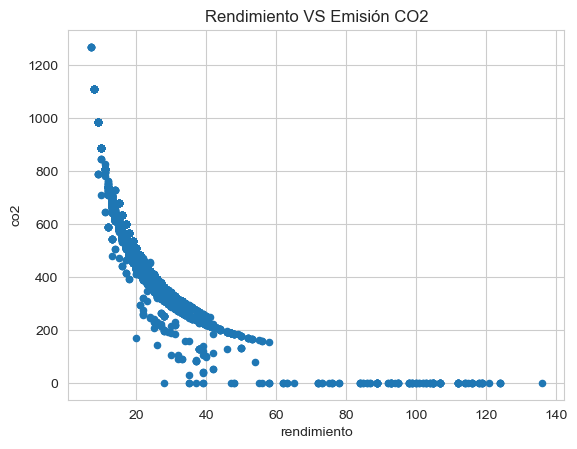

In [23]:
fig = vehiculos.plot.scatter(x='rendimiento', y='co2', title = 'Rendimiento VS Emisión CO2')

Como se pueden observar en la gráfica, la variable `rendimiento` refleja la eficiencia del vehículo. Esto es coherente con la descripción del conjunto de datos en la cual se establece que el rendimiento es expresado en _Miles/Galon_.

Es importante notar que, de acuerdo con la descripción del conjunto de datos, mientras que el rendimiento se expresa en _Miles/Galon_, la emisión de CO2 es expresada en GPM (_Grames/Mile_). Por lo tanto, __un análisis riguroso debe realizarse sobre valores expresados en unidades comparables__, en este caso, el rendimiento es convertido a litros por milla.

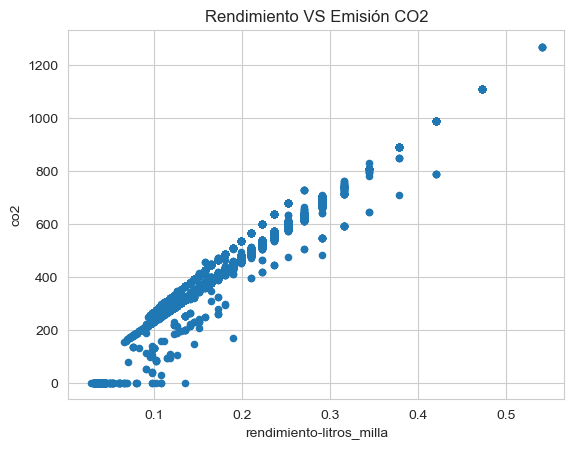

In [25]:
litros_por_galon = 3.78541
vehiculos['rendimiento-litros_milla'] = litros_por_galon/vehiculos['rendimiento']
fig = vehiculos.plot.scatter(x='rendimiento-litros_milla',y='co2',title = 'Rendimiento VS Emisión CO2')

El gráfico muestra que, a mayor consumo de combustible por milla recorrida, mayor es la emisión de CO2.

Otros análisis sugeridos:

- Evolución en el tiempo de los niveles de emisión de CO2, a partir de la agrupación de modelos de vehículos (`clase-tipo`).
- Detectar los modelos de vehículos (`marca + modelo`) que más contaminan en el último tiempo.

### Exportar datos (pre)procesados

- Generalmente, un formato muy extendido para el intercambio de datos es CSV.

- CSV (_Comma Separated Values_), es un formato sencillo y _transparente_ que consiste en regustros for fila, y cada campo es separado por una coma.

- Al almacenar datos (pre)procesados en formato CSV se pierde información (_metadata_) de las estructuras de datos de Pandas (e.g., tipos de variables).

- Es recomendable usar formatos nativos de Python para almacenar de los datos entre etapas del procesamiento (entre fases).

- Para distribuir (o compartir datos) se recomienda el uso de formatos de intercambio (e.g., CSV, TXT, ASCII)

El formato estándar de serialización (en términos prácticos, para el almacenamiento datos) en Python es [`pickle`](https://docs.python.org/3/library/pickle.html). Este formato conserva __las propiedades de las estructuras de datos__.

In [26]:
vehiculos.to_pickle('./out/vehiculos-3-variables_agrupadas.pkl')